<a href="https://colab.research.google.com/github/maurosimeonoff/python_fundamentals/blob/main/An%C3%A1lisis_y_Visualizaci%C3%B3n_de_Medallas_por_Pa%C3%ADs_y_A%C3%B1o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objetivo de la Actividad:
Esta actividad está diseñada para mejorar las habilidades de los estudiantes en la combinación de varias técnicas de análisis de datos y visualización. Los estudiantes aprenderán a trabajar con datos de múltiples dimensiones, realizar un filtrado y clasificación más complejos y crear tanto gráficos de barras como de pastel para representar diferentes aspectos de los mismos datos.

Actividad: Análisis y Visualización de Medallas por País y Año
Crea una gráfica de barras que represente a los 10 países con más medallas ganadas. Se debe de ver claramente qué país pertenece a cada una de las barras representadas en el gráfico.
Crear y guardar una gráfica de pastel del año más reciente existente en la base de datos. Se debe de leer claramente los datos dentro del gráfico, por lo que se debe de encontrar alguna manera de organizarlo para que el usuario pueda interpretar claramente la gráfica.

Parte 1

1.-Importa las librerías necesarias (pandas y matplotlib).

2.- Lee el archivo CSV y filtra los datos para incluir solo a los atletas que hayan recibido una medalla.

3.- Agrupa los datos por país ('Team') y cuenta el número de medallas ganadas por cada país .value_counts(). Luego, selecciona los 10 países con más medallas .head(10) y crea una gráfica de barras con estos datos, asegúrate de añadir etiquetas a los ejes y un título para que la gráfica sea clara y legible.

Ejemplo de gráfica:  medallas_por_pais.plot(kind='bar', color='skyblue')

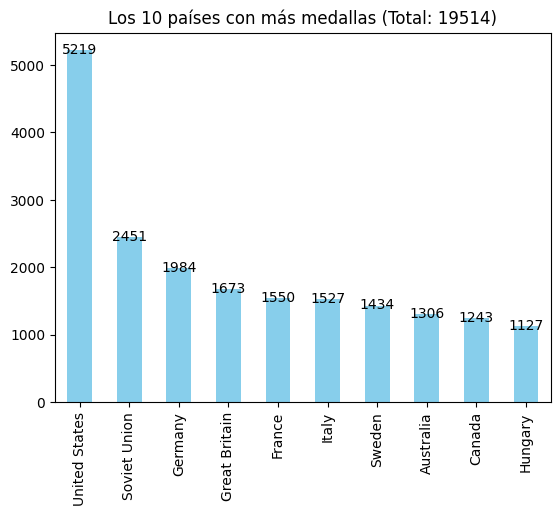

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo a trabajar
df = pd.read_csv("athlete_events.csv")

# Limpiar los datos para dejar únicamente los que ganaron una medalla
df = df[df["Medal"].notnull()]

# Usar .value_counts() para poder contar y agrupar por país el número de medallas que han conseguido
medallas_por_pais = df["Team"].value_counts()

# Usar .head(10) para seleccionar los 10 países con más medallas
medallas_por_pais = medallas_por_pais.head(10)

# Calcular la cantidad total de medallas
total_medallas = medallas_por_pais.sum()

# Usar el método .plot() definiendo el tipo de gráfico
ax = medallas_por_pais.plot(kind="bar", color="skyblue")

# Agregar título al gráfico con la cantidad total de medallas
plt.title(f"Los 10 países con más medallas (Total: {total_medallas})")

# Mostrar los valores en la parte superior de cada barra
for i, v in enumerate(medallas_por_pais):
    ax.text(i, v + 5, str(v), ha="center", va="center")

plt.show()

Parte 2

1.- A continuación, haz otro filtro def los datos para incluir sólo el año más reciente presente en los datos ['Year'].max() y agrupa los datos por país. Luego, genera una gráfica de pastel que represente el número de medallas ganadas por cada país.

Ejemplo de gráfica:  medallas_ultimo_año.plot(kind='pie')

Recuerda que es importante prestar atención a los detalles al generar gráficos. Asegúrate de que las etiquetas, títulos y otras anotaciones sean claras y precisas para que tus gráficos sean fácilmente interpretados por otros.

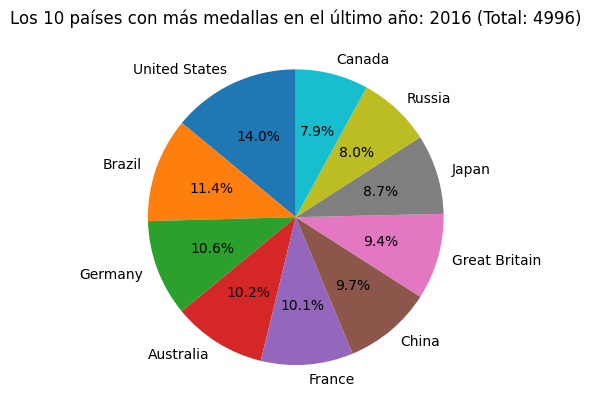

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo a trabajar
df = pd.read_csv("athlete_events.csv")

# Encontrar el último año que se tiene en los datos, usando .max() en la columna de Year
ultimo_año = df["Year"].max()

# Filtrar los datos para tener solamente los datos del último año
latest = df[df["Year"] == ultimo_año]

# Agrupar por país y contar el número de veces que aparece para determinar las medallas
medallas_ult_a = latest["Team"].value_counts()

# Obtener los 10 países con más medallas en el último año
top_10_paises = medallas_ult_a.head(10)

# Calcular la participación relativa (porcentaje) para el gráfico
porcentajes = top_10_paises / top_10_paises.sum() * 100

# Crear el gráfico de pastel
fig, ax = plt.subplots()
ax.pie(top_10_paises, labels=top_10_paises.index, autopct='%1.1f%%', startangle=90)

# Agregar título al gráfico con el año en cuestión y la cantidad de medallas
plt.title(f"Los 10 países con más medallas en el último año: {ultimo_año} (Total: {top_10_paises.sum()})")

plt.show()